# Mergings

## Imports

In [77]:
import sys
sys.path.append("../../src")
%reload_ext autoreload
%autoreload 2
from helpers import graph
from path_invariants import *

## Merges

In a merge $C$ of $A$, $B$, successors of each trace are kept: $a_i \overset{A}{\rightarrow} a_j$ and $b_i \overset{B}{\rightarrow} b_j$. Trivial merges is $C=AB$ the concatenation, or $C=AAA$ the loop. But, other interleaved combinations also exists:

'C=pxyq'

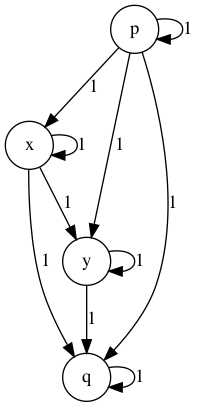

In [78]:
A  ="pq"; B="xy"
C  = "p"+B+"q"
sgC=successor_graph(C)

display("C=%s" % C)
graph( sgC, filename="figures/merge-interleaved.png") 

Note that this is not full merge because some inter successors don't appear.

In [79]:
[ ( (a,b), (b,a), (a, b) in sgC.edges, (b, a) in sgC.edges ) for a in A for b in B]

[(('p', 'x'), ('x', 'p'), True, False),
 (('p', 'y'), ('y', 'p'), True, False),
 (('q', 'x'), ('x', 'q'), False, True),
 (('q', 'y'), ('y', 'q'), False, True)]

## Full Merges

In the full merge for all $r$, $s$ it is verified that $r \overset{T}{\rightarrow} s \iff s \overset{T}{\rightarrow} r$

### By Concatenation

A simple way to make a full merge $C = A * B$ is to concatenate paths forward and then backward: $C = A B B A$, or more generally: $C = X_1 X_2 ... X_N X_N ... X_2 X_1$

'C=pqxyxypq'

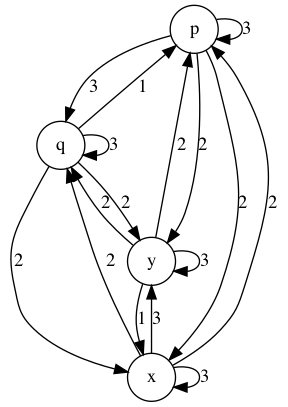

In [80]:
A  ="pq"; B="xy"
C  = A+B+B+A
sgC=successor_graph(C)

display("C=%s" % C)
graph( sgC, filename="figures/full-merge-concat-trick.png") 

In [81]:
[ ( (a,b), (b,a), (a, b) in sgC.edges, (b, a) in sgC.edges ) for a in A for b in B]

[(('p', 'x'), ('x', 'p'), True, True),
 (('p', 'y'), ('y', 'p'), True, True),
 (('q', 'x'), ('x', 'q'), True, True),
 (('q', 'y'), ('y', 'q'), True, True)]

### Interleaved full merge

$C=A * B$ by including interleaving between elements of $A$, $B$ means that the sequence are broken so the concatenation trick $ABBA$ is no longer valid. To manually build an interleaved full merge, note that if for each $a \in A$ the structures $BaB$ appears, then the  $a \overset{C}{\rightarrow} b \iff b \overset{C}{\rightarrow} a$ is verified. But, to also maintain  $a_i \overset{A}{\rightarrow} a_j$ a possible solution is:

$C=A B a_1 B a_2 B a_3 B ... a_{N-1} B a_N, \quad N=|A|$

Obviously, this is not the only way to build interleaved full merges.

'C=pqxypxyq'

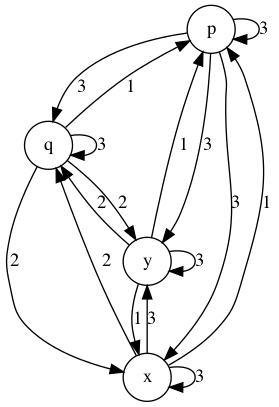

In [82]:
A  ="pq"; B="xy"
C  = A + B + "p" + B + "q"
sgC=successor_graph(C)

display("C=%s" % C)
graph( sgC, filename="figures/full-merge-interleaved.png") 

In [83]:
[ ( (a,b), (b,a), (a, b) in sgC.edges, (b, a) in sgC.edges ) for a in A for b in B]

[(('p', 'x'), ('x', 'p'), True, True),
 (('p', 'y'), ('y', 'p'), True, True),
 (('q', 'x'), ('x', 'q'), True, True),
 (('q', 'y'), ('y', 'q'), True, True)]

### Lemma: merge to full merge

A **lemma** is that a 2-loop of a merge is a full-merge. If $C$ is a merge betwwn $A$, $B$, then $CC$ has all inter-succesors, Beautiful!

In [86]:
A  = "pq"
B  = "abc"
C  = "p"+B+"q"
C2 = C+C

sgC =successor_graph(C)
sgC2=successor_graph(C2)

C is not a full merge

In [87]:
[ ( (a,b), (b,a), (a, b) in sgC.edges, (b, a) in sgC.edges ) for a in A for b in B]

[(('p', 'a'), ('a', 'p'), True, False),
 (('p', 'b'), ('b', 'p'), True, False),
 (('p', 'c'), ('c', 'p'), True, False),
 (('q', 'a'), ('a', 'q'), False, True),
 (('q', 'b'), ('b', 'q'), False, True),
 (('q', 'c'), ('c', 'q'), False, True)]

But C2 **is a full merge**

In [88]:
[ ( (a,b), (b,a), (a, b) in sgC2.edges, (b, a) in sgC2.edges ) for a in A for b in B]

[(('p', 'a'), ('a', 'p'), True, True),
 (('p', 'b'), ('b', 'p'), True, True),
 (('p', 'c'), ('c', 'p'), True, True),
 (('q', 'a'), ('a', 'q'), True, True),
 (('q', 'b'), ('b', 'q'), True, True),
 (('q', 'c'), ('c', 'q'), True, True)]